<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependenices" data-toc-modified-id="Dependenices-1">Dependenices</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5">Heatmap</a></span></li></ul></div>

# Dependenices

In [1]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welco

# Functions

In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")


Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex hea

In [3]:
gene_hm.fx <- function(genes_mat){

   # col_fun= colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
    
    gene_hm = Heatmap(genes_mat,
                       #titles and names   
                       name = "Gene expression z score",   
                       show_row_names = TRUE,
                       show_column_names = FALSE,     
                       #clusters and orders  
                       cluster_columns = TRUE,
                       cluster_rows = TRUE,
                       show_column_dend = TRUE,
                       show_row_dend = TRUE,                      
                       #row_dend_width = unit(8, "cm"),
                       #aesthestics
                 #      col = col_fun,
                       column_names_gp = gpar(fontsize = 20),
                       row_names_gp = gpar(fontsize = 20),
                       height = unit(nrow(genes_mat), "cm"),
                       column_title_gp = gpar(fontsize = 20),
                       column_title = NULL,
                       row_title = NULL)
    return(gene_hm)   
}

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [5]:
load(file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [6]:
metadata_IC[ metadata_IC$sample_id == "7316-905",]

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,sample_id,gender,ethnicity,race,⋯,recurrence,disease_type,primary_site,group,cohort,sample_type,age_class,tumour_subtype,CRI_cluster,immune_cluster
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
7316-905,734521,-824.7308,47.61364,-777.1171,c093a12d-5b68-486b-8f0b-f03cc3aec51f.rsem.genes.results,C186714,7316-905,Female,Not Hispanic or Latino,White,⋯,0,Ganglioglioma,Occipital Lobe,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_KIAA1549,Inflammatory,Pediatric cold


# Heatmap

In [7]:
load(paste0(datapath, "exp_mat/tpm_matrix_ped_final.RData"))

In [8]:
dim(tpm_matrix_ped_final)

[1] 20105   925

In [9]:
immunoreg <- read.csv(file = paste0(datapath, "Geneset/Riaz_Immunoreg_geneset.csv"), 
                      header = T, stringsAsFactors = F, check.names = F)

In [10]:
reg_genes <- trimws(immunoreg$Gene)

In [11]:
reg_genes

[1] "TNFRSF9"  "IDO1"     "TDO2"     "FASLG"    "KLRC2"    "IL6"     
 [7] "CXCL8"    "IL23A"    "STAT3"    "FGF2"     "CXCL1"    "IL1RN"   
[13] "IL10"     "IL11"     "IL13"     "TGFB1"    "TGFB2"    "TGFB3"   
[19] "YAP1"     "CXCL5"    "PRKCI"    "PDCD1"    "CD274"    "CTLA4"   
[25] "CEACAM1"  "CD47"     "LAG3"     "TIGIT"    "PDCD1LG2" "CD276"   
[31] "IL4I1"    "VEGFA"    "VEGFC"    "VEGFD"    "FOXP3"    "ADORA2A" 
[37] "ARHGEF5"  "BTLA"     "CD160"    "CD244"    "CD27"     "CD80"    
[43] "GEM"      "HAVCR2"   "ICOS"     "TNFSF4"   "VTCN1"    "CSF2"    
[49] "LGALS3"   "CCL2"     "PTGES2"   "ARG1"     "PDGFC"    "TNFRSF4" 
[55] "SIRPA"    "HMGB1"    "MRC2"     "VSIR"     "ENTPD1"

In [12]:
mycluster <- as.character(metadata_IC$immune_cluster)
names(mycluster) <- rownames(metadata_IC)
cluster_hm <- class_hm.fx(mycluster)

In [13]:
mycohort <- metadata_IC$cohort
names(mycohort) <- metadata_IC$sample_id
mycohorts <- t(as.matrix(mycohort))
rownames(mycohorts) <- "Cohort"
cohorts_hm <- cohorts_hm.fx(mycohorts)

In [14]:
reg_genes <- reg_genes[reg_genes %in% rownames(tpm_matrix_ped_final)]

In [15]:
mygen_mat <- tpm_matrix_ped_final[ reg_genes, metadata_IC$sample_id]
dim(mygen_mat)

[1]  59 925

In [16]:
mygen_mat_log <- log2(mygen_mat + 1)

In [33]:
head(mygen_mat_log)

,TARGET-30-PAIFXV-01A,TARGET-30-PAIPGU-01A,TARGET-30-PAISNS-01A,TARGET-30-PAITCI-01A,TARGET-30-PAIVHE-01A,TARGET-30-PAIXIF-01A,TARGET-30-PAKYZS-01A,TARGET-30-PAKZRH-01A,TARGET-30-PALBFW-01A,TARGET-30-PALCBW-01A,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
TNFRSF9,1.2203300,1.4905701,0.22650853,0.43295941,0.7048720,0.5058909,3.16832112,0.07038933,0.7990873,0.9781956,⋯,0.13750352,0.27500705,0.04264434,0.02856915,0.16349873,0.0000000,0.07038933,0.27500705,0.33342373,0.07038933
IDO1,2.5509007,2.2357271,0.94860085,0.77399633,1.5655972,2.3868109,0.21412481,1.20163386,1.4698860,2.1699250,⋯,0.00000000,0.12432814,0.22650853,0.00000000,0.15055968,0.0000000,0.15055968,0.01435529,0.09761080,0.12432814
TDO2,1.1634987,3.7949357,0.61353165,2.28392177,2.6016965,1.7865964,1.74416110,1.32768736,1.2750070,1.1634987,⋯,0.22650853,0.15055968,0.04264434,0.55581616,0.18903382,0.0000000,0.71369581,0.07038933,0.15055968,1.12432814
FASLG,0.1375035,0.5849625,0.02856915,0.07038933,0.4541759,0.1505597,0.07038933,0.05658353,0.3448285,0.3448285,⋯,0.01435529,0.04264434,0.01435529,0.01435529,0.08406426,0.0000000,0.11103131,0.02856915,0.01435529,0.00000000
KLRC2,1.2078929,0.2387869,0.32192809,0.46466827,0.3448285,0.4114262,0.45417589,0.08406426,0.9927684,0.5945485,⋯,2.68929916,1.65535183,2.17312743,3.40053793,1.76553475,3.0635029,2.23878686,2.67807191,4.06781078,3.36737107
IL6,5.5604093,1.1309309,1.57531233,4.19770816,4.7527486,6.5248159,4.39574833,1.26303441,3.7886857,2.0942361,⋯,0.16349873,0.67807191,0.36737107,0.18903382,0.27500705,0.1375035,0.26303441,0.27500705,0.41142625,0.00000000


In [17]:
mygen_mat_z <- t(scale(t(mygen_mat_log)))

In [18]:
gene_hm <- gene_hm.fx(mygen_mat_z)

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



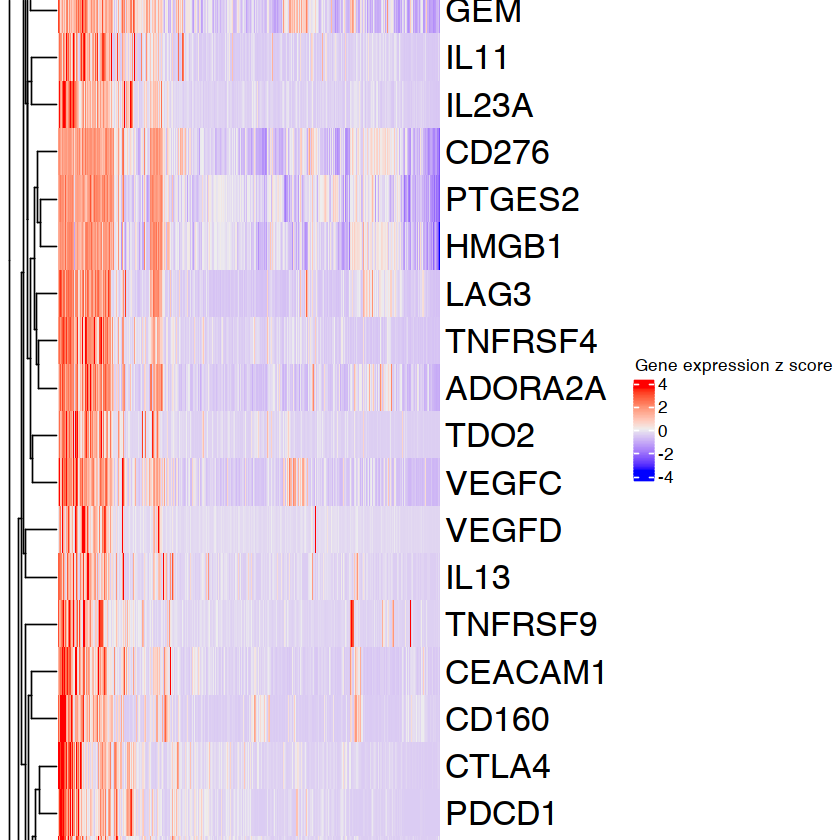

In [19]:
gene_hm %v% cluster_hm %v% cohorts_hm

In [20]:
pdf(paste0(plotpath, "heatmap_immunoregulatory_genes.pdf"),
   width = 20, height = 40)
gene_hm %v% cluster_hm %v% cohorts_hm
dev.off()

pdf 
  2

Get median of log2 gene expression for each immune cluster

In [21]:
median_mat <- matrix(nrow = 59, ncol = 4,
                    dimnames = list(rownames(mygen_mat_log), c("Pediatric inflamed", "Myeloid-driven", 
                                                               "Pediatric cold", "Immune excluded")))

In [24]:
mygen_mat_log <- as.matrix(mygen_mat_log)

In [30]:
for( g in rownames(mygen_mat_log)){
    median_mat[g,1] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "Pediatric inflamed"]])
    median_mat[g,2] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "Myeloid-driven"]])    
    median_mat[g,3] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "Pediatric cold"]])
    median_mat[g,4] <- median(mygen_mat_z[g, metadata_IC$sample_id[metadata_IC$immune_cluster == "Immune excluded"]])
}

In [31]:
   # col_fun= colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
    
    median_gene_hm = Heatmap(t(median_mat),
                       #titles and names   
                       name = "Median z score",   
                       show_row_names = TRUE,
                       show_column_names = TRUE,     
                       #clusters and orders  
                       cluster_columns = TRUE,
                       cluster_rows = TRUE,
                       show_column_dend = TRUE,
                       show_row_dend = TRUE,                      
                       #row_dend_width = unit(8, "cm"),
                       #aesthestics
                 #      col = col_fun,
                       column_names_gp = gpar(fontsize = 10),
                             column_names_rot = 45,
                       row_names_gp = gpar(fontsize = 15),
                       width = unit(nrow(median_mat)/2, "cm"),
                       height = unit(ncol(median_mat), "cm"),
                       column_title_gp = gpar(fontsize = 20),
                       column_title = NULL,
                       row_title = NULL)

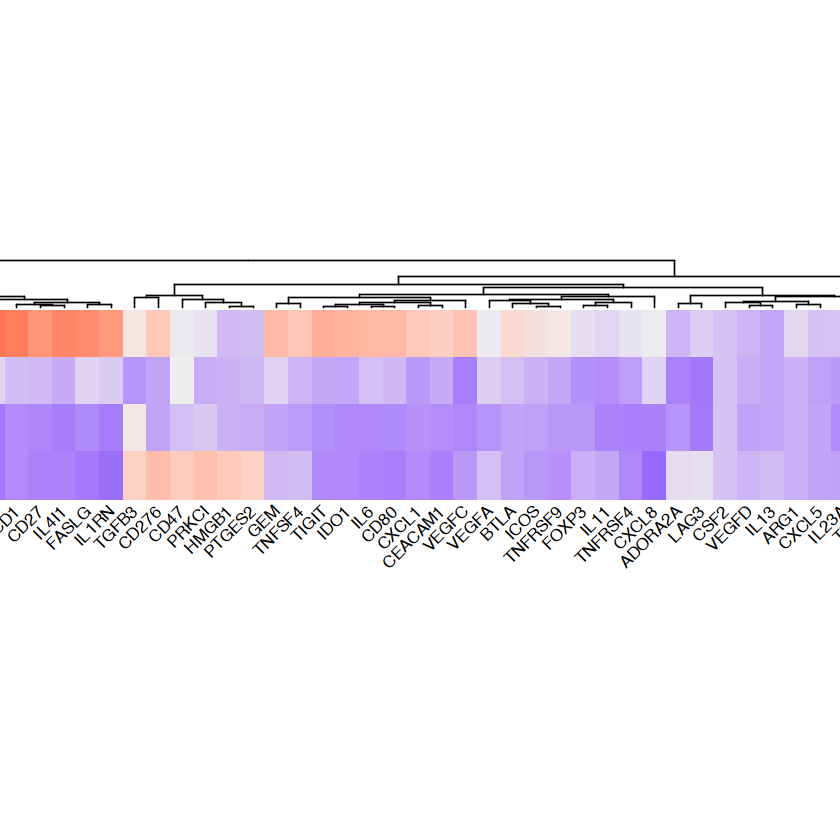

In [32]:
median_gene_hm

In [34]:
pdf(paste0(plotpath, "heatmap_median_immunoregulatory_genes_IC.pdf"),
   width = 20, height = 40)
median_gene_hm
dev.off()

pdf 
  2